# Init

In [1]:
!pip install pandas matplotlib scikit-learn imbalanced-learn seaborn tensorflow

import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, matthews_corrcoef
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
def merge_csv_parts(input_folder, output_filename):
    # List all CSV files in the input folder
    csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

    # Sort files by their part number to maintain the original order
    csv_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

    # Initialize an empty dataframe
    merged_df = pd.DataFrame()

    # Append each file's data to the merged dataframe
    for file in csv_files:
        df_part = pd.read_csv(os.path.join(input_folder, file))
        merged_df = pd.concat([merged_df, df_part], ignore_index=True)

    # Save the merged dataframe to a CSV file
    merged_df.to_csv(output_filename, index=False)

    print(f'Successfully merged {len(csv_files)} files into {output_filename}.')

def split_csv_into_parts(filename, output_folder, num_files=100):
    # Load the CSV file
    df = pd.read_csv(filename)

    # Calculate the number of rows per file
    rows_per_file = math.ceil(len(df) / num_files)

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Split the dataframe and save each part
    for i in range(num_files):
        start_index = i * rows_per_file
        end_index = start_index + rows_per_file
        df_part = df.iloc[start_index:end_index]
        df_part.to_csv(os.path.join(output_folder, f'part_{i}.csv'), index=False)

    print(f'Successfully split the file into {num_files} parts.')

def download_files_in_sequence(base_url,output_folder="creditcard"):
    """
    Downloads files in sequence from a base URL until a 404 Not Found error is encountered.

    Args:
    - base_url: The base URL for the files, up to but not including the part number.
                For example: "https://example.com/files/part_"
    """
    part_number = 0
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    while True:
        # Construct the URL for the current part
        url = f"{base_url}{part_number}.csv"

        # Make the HTTP request
        response = requests.get(url)

        # Check if the file was found
        if response.status_code == 404:
            print(f"No more files to download after part {part_number - 1}. Stopping.")
            break
        elif response.status_code == 200:
            # Save the file
            filename = url.split("/")[-1]  # Extract the filename from the URL
            with open(os.path.join(output_folder, filename), 'wb') as file:
                file.write(response.content)
            print(f"Downloaded {filename}")
        else:
            print(f"Encountered unexpected HTTP status code {response.status_code} for {url}. Stopping.")
            break

        part_number += 1

# Example usage
base_url = "https://raw.githubusercontent.com/Kesehet/google-colab/main/creditcard/part_"
folder = "creditcard"
filename = folder+".csv"
download_files_in_sequence(base_url,folder)
merge_csv_parts(folder, filename)



Downloaded part_0.csv
Downloaded part_1.csv
Downloaded part_2.csv
Downloaded part_3.csv
Downloaded part_4.csv
Downloaded part_5.csv
Downloaded part_6.csv
Downloaded part_7.csv
Downloaded part_8.csv
Downloaded part_9.csv
Downloaded part_10.csv
Downloaded part_11.csv
Downloaded part_12.csv
Downloaded part_13.csv
Downloaded part_14.csv
Downloaded part_15.csv
Downloaded part_16.csv
Downloaded part_17.csv
Downloaded part_18.csv
Downloaded part_19.csv
Downloaded part_20.csv
Downloaded part_21.csv
Downloaded part_22.csv
Downloaded part_23.csv
Downloaded part_24.csv
Downloaded part_25.csv
Downloaded part_26.csv
Downloaded part_27.csv
Downloaded part_28.csv
Downloaded part_29.csv
Downloaded part_30.csv
Downloaded part_31.csv
Downloaded part_32.csv
Downloaded part_33.csv
Downloaded part_34.csv
Downloaded part_35.csv
Downloaded part_36.csv
Downloaded part_37.csv
Downloaded part_38.csv
Downloaded part_39.csv
Downloaded part_40.csv
Downloaded part_41.csv
Downloaded part_42.csv
Downloaded part_43.cs

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('creditcard.csv')

# Extract the relevant columns
df = df[['Time', 'Amount', 'Class']]

df = df.dropna(subset=['Class'])

df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [4]:
# Perform oversampling using RandomOverSampler
X = df.drop('Class', axis=1)
y = df['Class']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

# Split the data into features and target variable
X = df_resampled.drop('Class', axis=1)
y = df_resampled['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

Accuracy: 0.9975
Precision: 0.9950
Recall: 1.0000
F1 Score: 0.9975
ROC AUC Score: 0.9990
True Positive Rate: 1.0000
False Positive Rate: 0.0051
MCC: 0.9949


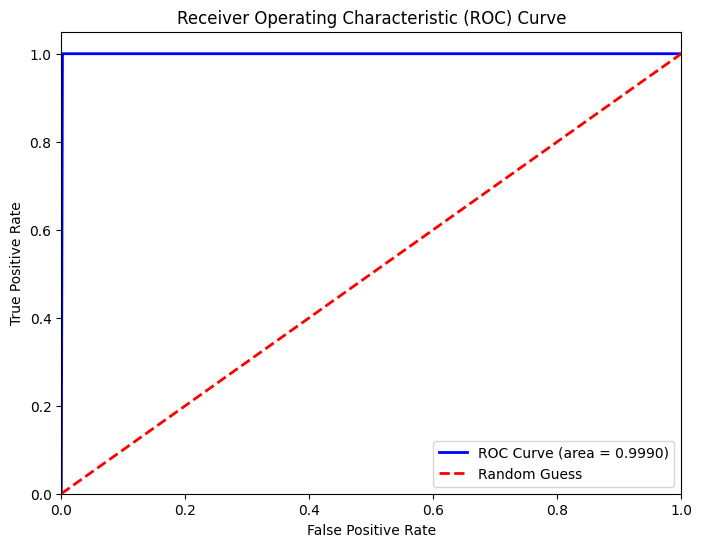

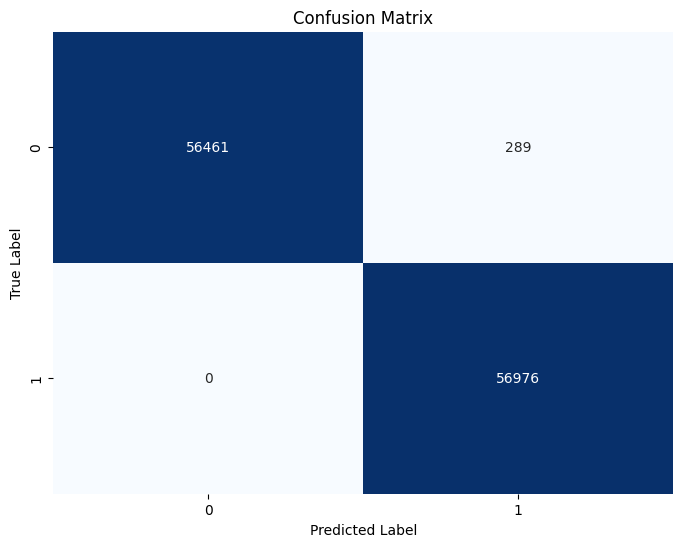

In [5]:
# Train the KNN model
k = 5  # Example: using 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)
y_prob = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'True Positive Rate: {tpr:.4f}')
print(f'False Positive Rate: {fpr:.4f}')
print(f'MCC: {mcc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Näive Bayes

Accuracy: 0.9975
Precision: 0.9950
Recall: 1.0000
F1 Score: 0.9975
ROC AUC Score: 0.9990
True Positive Rate: 1.0000
False Positive Rate: 0.0051
MCC: 0.9949


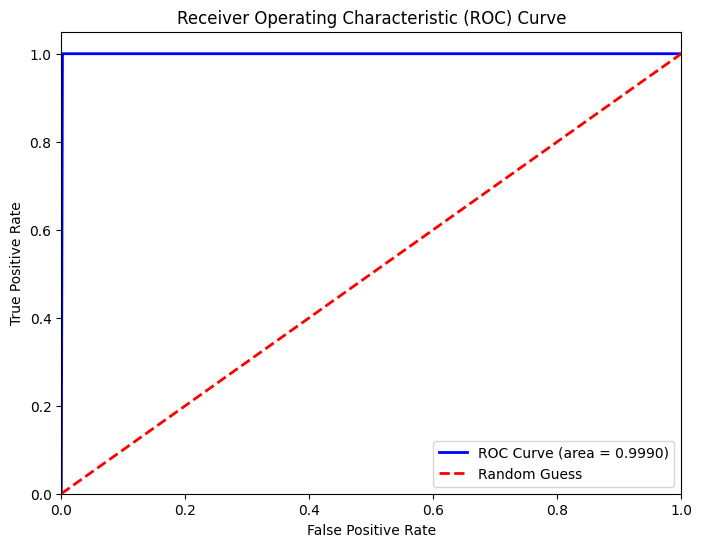

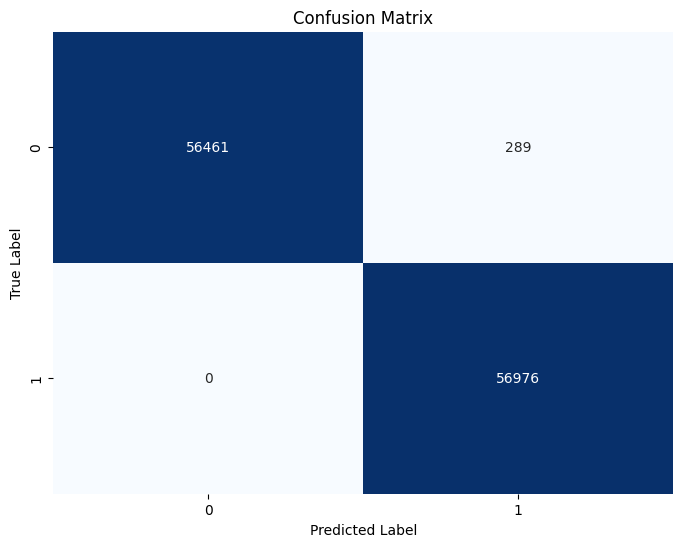

In [6]:
# Train the KNN model
k = 5  # Example: using 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)
y_prob = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'True Positive Rate: {tpr:.4f}')
print(f'False Positive Rate: {fpr:.4f}')
print(f'MCC: {mcc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

Accuracy: 0.9995
Precision: 0.9990
Recall: 1.0000
F1 Score: 0.9995
ROC AUC Score: 0.9998
True Positive Rate: 1.0000
False Positive Rate: 0.0010
MCC: 0.9990


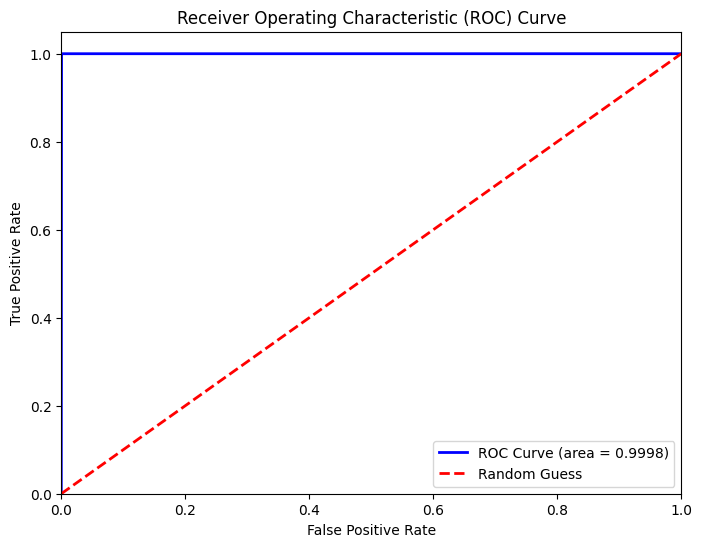

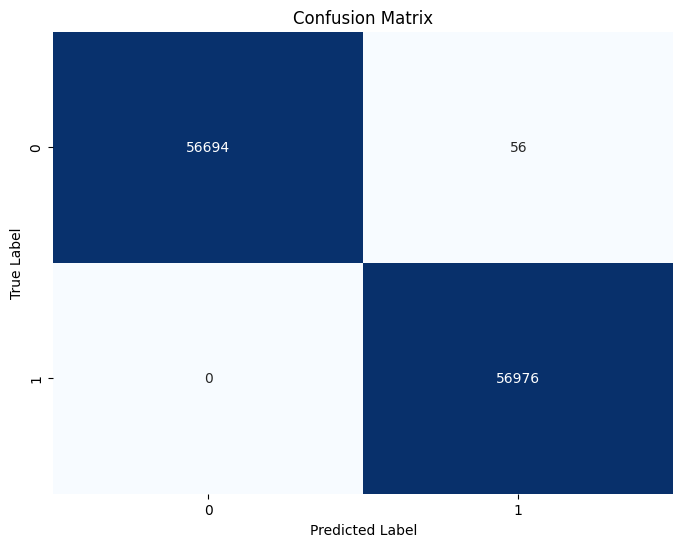

In [5]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'True Positive Rate: {tpr:.4f}')
print(f'False Positive Rate: {fpr:.4f}')
print(f'MCC: {mcc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression


Accuracy: 0.5564
Precision: 0.5538
Recall: 0.5891
F1 Score: 0.5709
ROC AUC Score: 0.5979
True Positive Rate: 0.5891
False Positive Rate: 0.4764
MCC: 0.1129


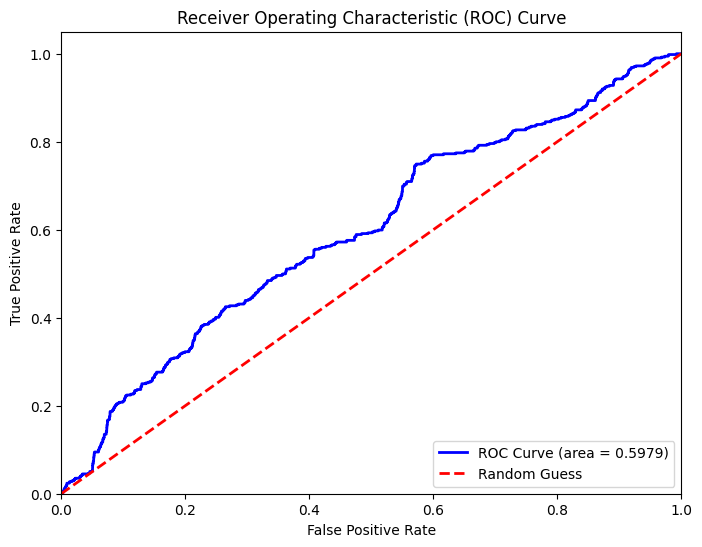

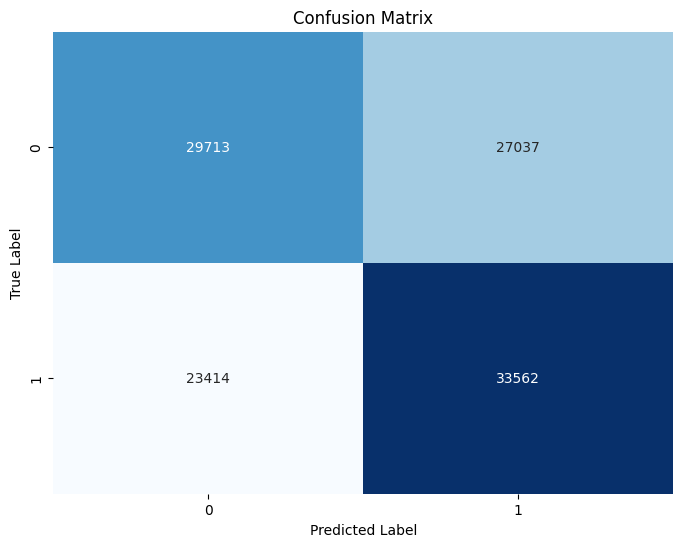

In [7]:
# Train the Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test_scaled)
y_prob = log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'True Positive Rate: {tpr:.4f}')
print(f'False Positive Rate: {fpr:.4f}')
print(f'MCC: {mcc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ANN

In [ ]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Predict on the test set
y_prob = model.predict(X_test_scaled)
y_pred = (y_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'True Positive Rate: {tpr:.4f}')
print(f'False Positive Rate: {fpr:.4f}')
print(f'MCC: {mcc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/20
  452/14216 [..............................] - ETA: 1:24 - loss: 0.6845 - accuracy: 0.5584

# Support Vector Machine

In [ ]:
# Train the SVM model
svm_model = SVC(kernel='rbf', probability=True)  # You can specify different kernels as needed
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'True Positive Rate: {tpr:.4f}')
print(f'False Positive Rate: {fpr:.4f}')
print(f'MCC: {mcc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()